In [0]:
from  keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import  LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math


Using TensorFlow backend.


In [0]:
(X_Train,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(X_Train.shape)

(60000, 28, 28)


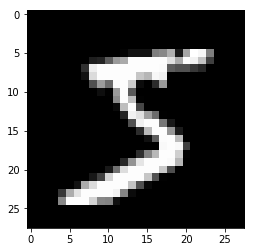

In [0]:

plt.imshow(X_Train[0],cmap='gray')

In [0]:
#normalize
X_Train = (X_Train.astype('float32')-127.5)/127.5


In [0]:
X_Train.shape

(60000, 28, 28)

In [0]:
Epoch = 50
Batch = 256
No_of_batche = int(X_Train.shape[0]/Batch)
Half_batch = 128
Noise_dim = 100 # to 784 upsampled
adam = Adam(lr=2e-4,beta_1 = 0.5)

In [0]:
generator = Sequential()
generator.add(Dense(256,input_shape=(Noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [0]:
#discriminator
dis = Sequential()
dis.add(Dense(512,input_shape=(784,)))
dis.add(LeakyReLU(0.2))
dis.add(Dense(256))
dis.add(LeakyReLU(0.2))
dis.add(Dense(128))
dis.add(LeakyReLU(0.2))
dis.add(Dense(1,activation='sigmoid'))
dis.compile(loss='binary_crossentropy',optimizer=adam)
dis.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [0]:
#Gan
#Step 2
dis.trainable =False
gan_input = Input(shape=(Noise_dim,))
gen_img = generator(gan_input)
gan_output = dis(gen_img)

model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer = adam)


In [0]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [0]:
def save_img(epoch,samples=100):

  noise = np.random.normal(0,1,size=(samples,Noise_dim))
  generated_img = generator.predict(noise)
  generated_img = generated_img.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_img[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}'.format(epoch +1))
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6111 Generator Loss 1.1962
Epoch 2 Disc Loss 0.6089 Generator Loss 1.2042
Epoch 3 Disc Loss 0.6077 Generator Loss 1.2007
Epoch 4 Disc Loss 0.6070 Generator Loss 1.2175
Epoch 5 Disc Loss 0.6051 Generator Loss 1.2182


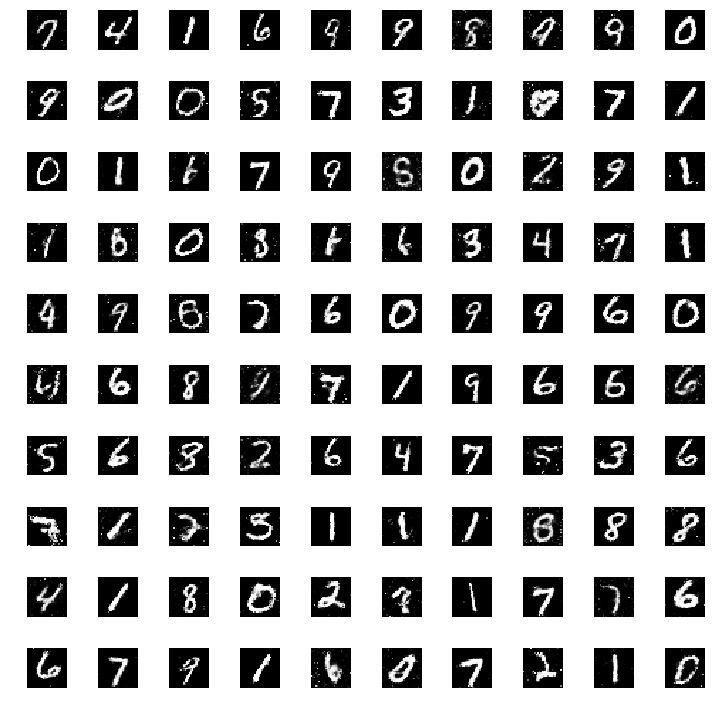

Epoch 6 Disc Loss 0.6078 Generator Loss 1.2183
Epoch 7 Disc Loss 0.6046 Generator Loss 1.2159
Epoch 8 Disc Loss 0.6057 Generator Loss 1.2180
Epoch 9 Disc Loss 0.6066 Generator Loss 1.2136
Epoch 10 Disc Loss 0.6056 Generator Loss 1.2170


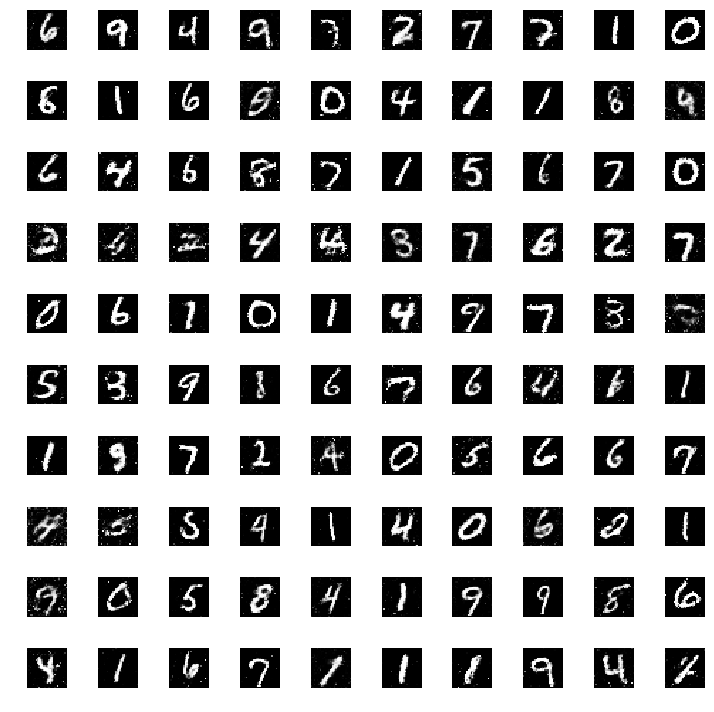

Epoch 11 Disc Loss 0.6033 Generator Loss 1.2248
Epoch 12 Disc Loss 0.6051 Generator Loss 1.2274
Epoch 13 Disc Loss 0.6011 Generator Loss 1.2330
Epoch 14 Disc Loss 0.6003 Generator Loss 1.2369
Epoch 15 Disc Loss 0.5996 Generator Loss 1.2402


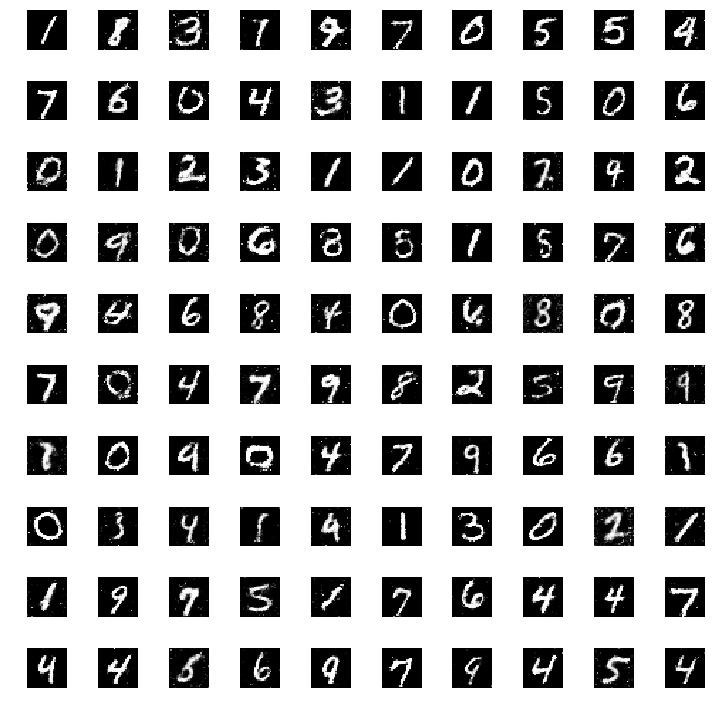

Epoch 16 Disc Loss 0.5995 Generator Loss 1.2447
Epoch 17 Disc Loss 0.5975 Generator Loss 1.2598
Epoch 18 Disc Loss 0.5995 Generator Loss 1.2370
Epoch 19 Disc Loss 0.5972 Generator Loss 1.2492
Epoch 20 Disc Loss 0.5970 Generator Loss 1.2535


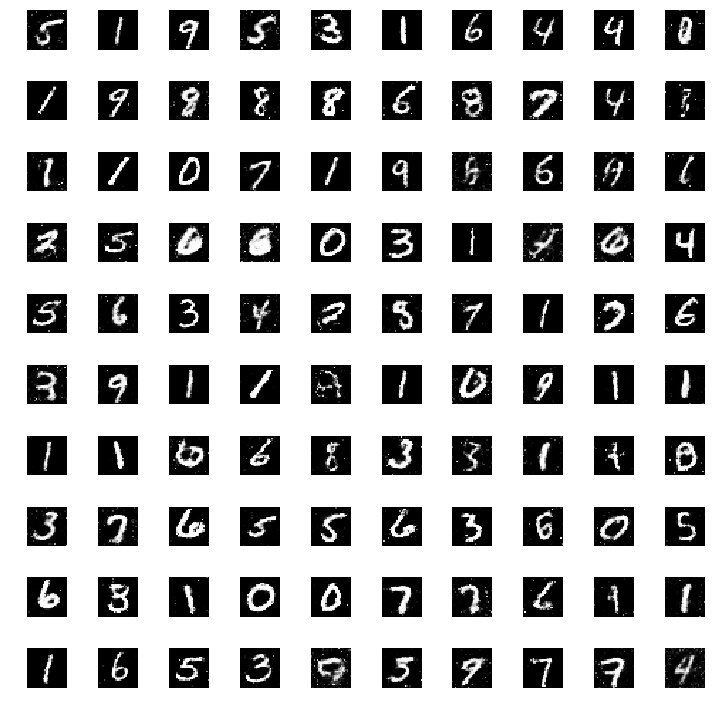

Epoch 21 Disc Loss 0.5956 Generator Loss 1.2523
Epoch 22 Disc Loss 0.5970 Generator Loss 1.2624
Epoch 23 Disc Loss 0.5949 Generator Loss 1.2688
Epoch 24 Disc Loss 0.5945 Generator Loss 1.2516
Epoch 25 Disc Loss 0.5965 Generator Loss 1.2686


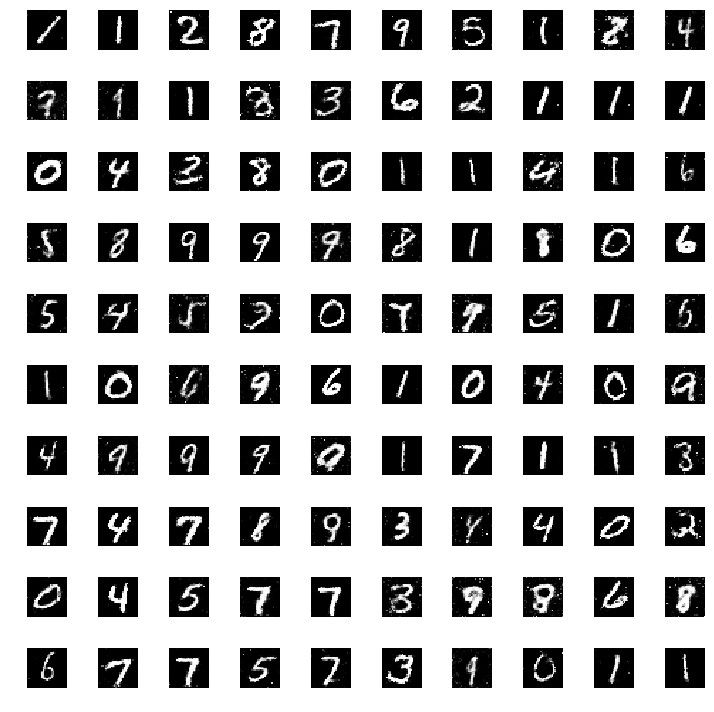

Epoch 26 Disc Loss 0.5925 Generator Loss 1.2774
Epoch 27 Disc Loss 0.5915 Generator Loss 1.2760
Epoch 28 Disc Loss 0.5931 Generator Loss 1.2852
Epoch 29 Disc Loss 0.5899 Generator Loss 1.2792
Epoch 30 Disc Loss 0.5940 Generator Loss 1.2754


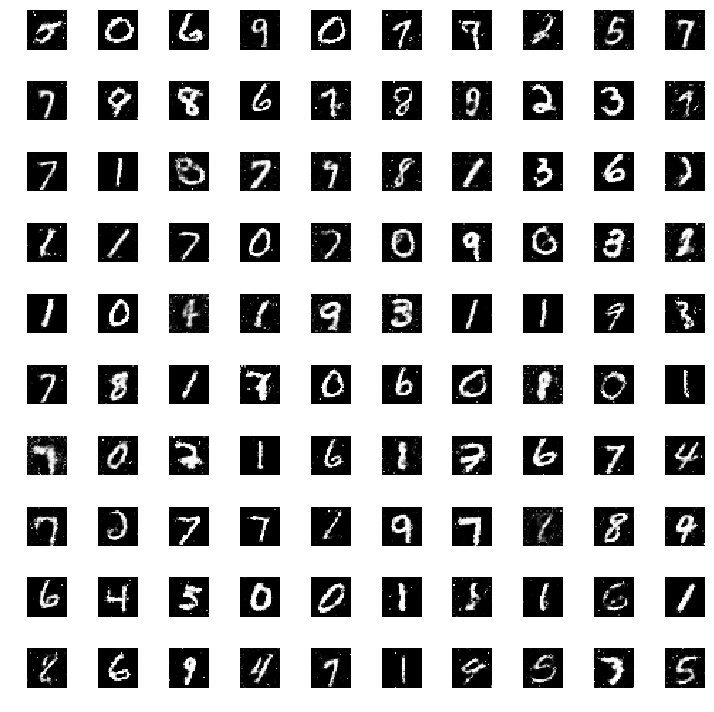

Epoch 31 Disc Loss 0.5903 Generator Loss 1.2867
Epoch 32 Disc Loss 0.5897 Generator Loss 1.2891
Epoch 33 Disc Loss 0.5884 Generator Loss 1.2937
Epoch 34 Disc Loss 0.5891 Generator Loss 1.2847
Epoch 35 Disc Loss 0.5876 Generator Loss 1.2882


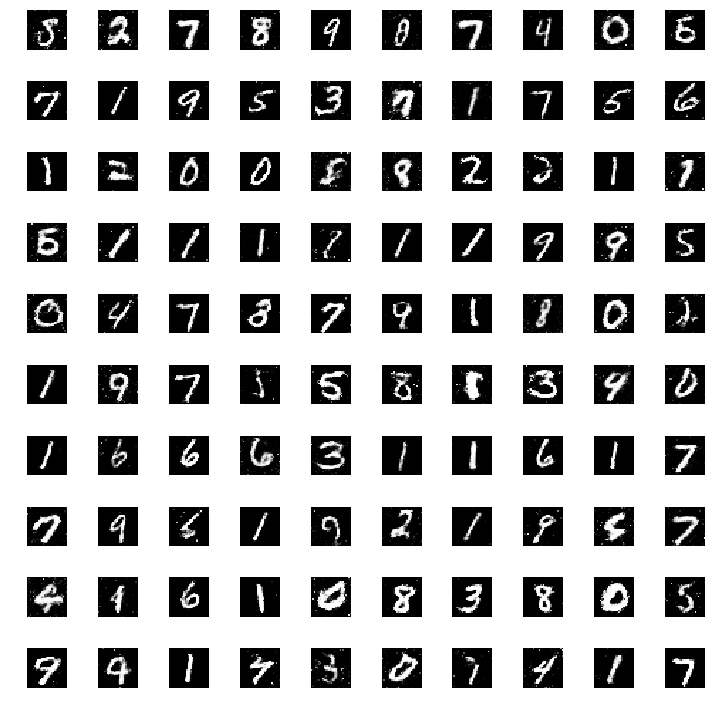

Epoch 36 Disc Loss 0.5888 Generator Loss 1.2916
Epoch 37 Disc Loss 0.5879 Generator Loss 1.2917
Epoch 38 Disc Loss 0.5871 Generator Loss 1.2926
Epoch 39 Disc Loss 0.5877 Generator Loss 1.2961
Epoch 40 Disc Loss 0.5861 Generator Loss 1.2984


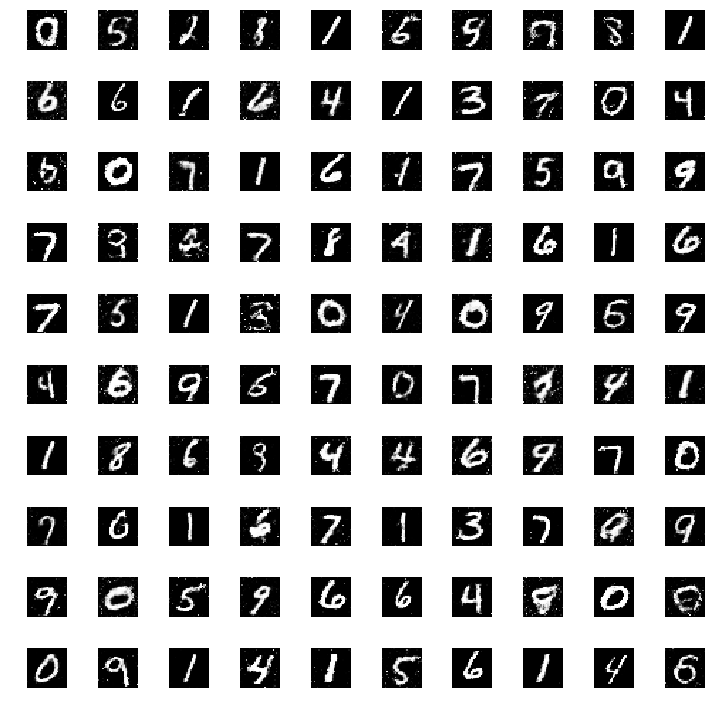

Epoch 41 Disc Loss 0.5873 Generator Loss 1.3004
Epoch 42 Disc Loss 0.5849 Generator Loss 1.3126
Epoch 43 Disc Loss 0.5845 Generator Loss 1.3064
Epoch 44 Disc Loss 0.5833 Generator Loss 1.3096
Epoch 45 Disc Loss 0.5838 Generator Loss 1.3135


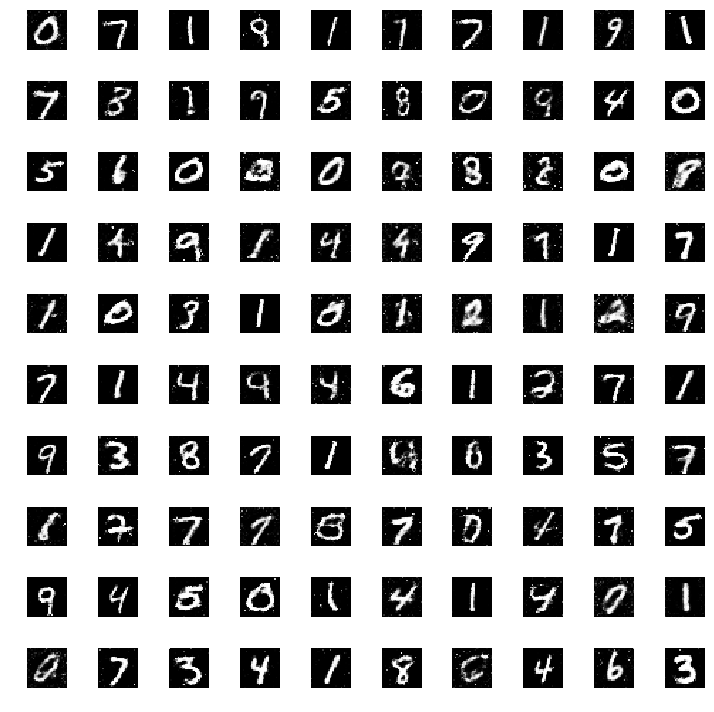

Epoch 46 Disc Loss 0.5828 Generator Loss 1.3111
Epoch 47 Disc Loss 0.5824 Generator Loss 1.3289
Epoch 48 Disc Loss 0.5808 Generator Loss 1.3232
Epoch 49 Disc Loss 0.5818 Generator Loss 1.3332
Epoch 50 Disc Loss 0.5804 Generator Loss 1.3313


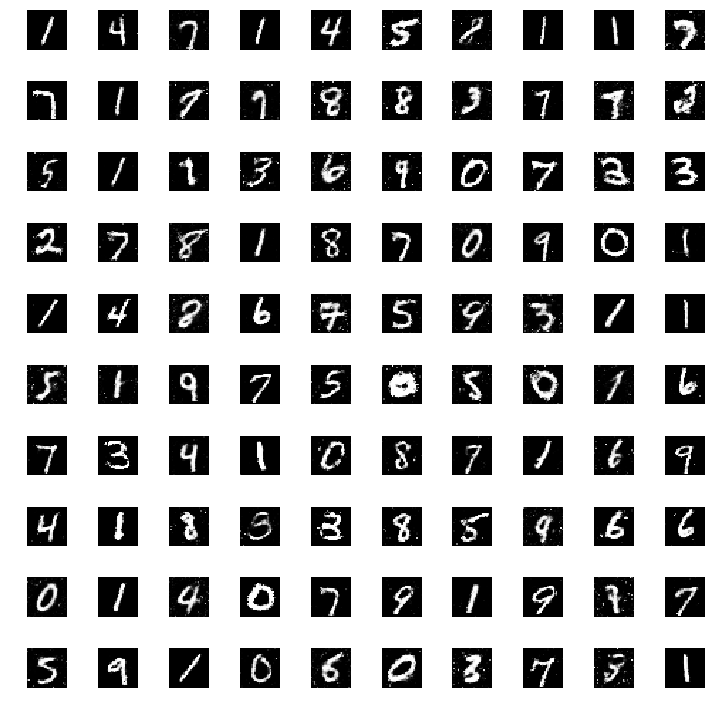

In [0]:
#Training Loop

for epoch in range(Epoch):
  epoch_d_loss = 0.
  epoch_g_loss = 0.
  

  for step in range(No_of_batche):
    #real img
    idx = np.random.randint(0,X_Train.shape[0],Half_batch)
    real_img = X_Train[idx]

    #Fake data
    noise = np.random.normal(0,1,size = (Half_batch,Noise_dim))
    fake_img = generator.predict(noise)

    #Labels
    real_y = np.ones((Half_batch,1))*0.9
    fake_y = np.zeros((Half_batch,1))
    # train dis
    d_loss_real = dis.train_on_batch(real_img,real_y)
    d_loss_fake = dis.train_on_batch(fake_img,fake_y)
    d_loss = 0.5*d_loss_real +0.5*d_loss_fake

    epoch_d_loss +=d_loss 
    #Train Gen(dis Frozen)
    noise = np.random.normal(0,1,size=(Batch,Noise_dim))
    ground_truth_y = np.ones((Batch,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss
  print("Epoch %d Disc Loss %.4f Generator Loss %0.4f" %((epoch+1),epoch_d_loss/No_of_batche,epoch_g_loss/No_of_batche))
  if (epoch+1)%5==0:
    generator.save('gen_generator_{0}.h5'.format(epoch+1))
    save_img(epoch)

In [0]:
!zip -r /content/images /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_15.png (deflated 8%)
  adding: content/images/gan_output_epoch_25.png (deflated 8%)
  adding: content/images/gan_output_epoch_20.png (deflated 8%)
  adding: content/images/gan_output_epoch_40.png (deflated 8%)
  adding: content/images/gan_output_epoch_5.png (deflated 8%)
  adding: content/images/gan_output_epoch_35.png (deflated 8%)
  adding: content/images/gan_output_epoch_45.png (deflated 8%)
  adding: content/images/gan_output_epoch_30.png (deflated 8%)
  adding: content/images/gan_output_epoch_10.png (deflated 8%)
  adding: content/images/gan_output_epoch_50.png (deflated 8%)


In [0]:
from google.colab import files
files.download('images.zip')

In [0]:
a = np.random.normal(0,1,size = (1,100))
img = generator.predict(a)

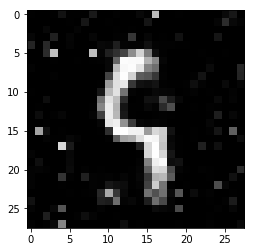

In [0]:
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')